Outgoing damage formula:

$$ \large \begin{align*}
    \mathrm{DMG_{out}} = \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right]
                         \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) && (1) \\
\end{align*} $$

Artifact stats roll cost:

$$ \large \begin{align*}
    \mathrm{Cost_{stats}} = \frac{\mathrm{ATK_{bonus}^{\%}} - \mathrm{\widetilde{ATK}_{bonus}^{\%}}}{0.0466}
                          + \frac{\mathrm{DMG_{bonus}^{\%}} - \mathrm{\widetilde{DMG}_{bonus}^{\%}}}{0.0466}
                          + \frac{\mathrm{Rate_{crit}^{\%}} - \mathrm{\widetilde{Rate}_{crit}^{\%}}}{0.0311}
                          + \frac{\mathrm{DMG_{crit}^{\%}} - \mathrm{\widetilde{DMG}_{crit}^{\%}}}{0.0622}
                          = \frac{\mathrm{ATK_{bonus}^{\%}}}{0.0466} + \frac{\mathrm{DMG_{bonus}^{\%}}}{0.0466}
                          + \frac{\mathrm{Rate_{crit}^{\%}}}{0.0311} + \frac{\mathrm{DMG_{crit}^{\%}}}{0.0622} - \mathrm{\widetilde{Cost}_{stats}} && (2) \\
\end{align*} $$

Lagrange multiplier:

$$ \large \begin{align*}
    \begin{cases}
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{ATK_{bonus}^{\%}}} = \lambda \frac{\partial \mathrm{Cost_{stats}}}{\partial \mathrm{ATK_{bonus}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{bonus}^{\%}}} = \lambda \frac{\partial \mathrm{Cost_{stats}}}{\partial \mathrm{DMG_{bonus}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{Rate_{crit}^{\%}}} = \lambda \frac{\partial \mathrm{Cost_{stats}}}{\partial \mathrm{Rate_{crit}^{\%}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{crit}^{\%}}} = \lambda \frac{\partial \mathrm{Cost_{stats}}}{\partial \mathrm{DMG_{crit}^{\%}}} \\ \\
    \end{cases}
    \implies
    \begin{cases}
        \mathrm{ATK_{base}} \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) = \frac{\lambda}{0.0466} && (3) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{Rate_{crit}^{\%}} \times \mathrm{DMG_{crit}^{\%}} \right) = \frac{\lambda}{0.0466} && (4) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \mathrm{DMG_{crit}^{\%}} = \frac{\lambda}{0.0311} && (5) \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{\%}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{\%}} \right) \times \mathrm{Rate_{crit}^{\%}} = \frac{\lambda}{0.0622} && (6) \\ \\
    \end{cases} \\
\end{align*} $$

From (3) and (4):

$$ \large \begin{align*}
    \mathrm{ATK_{bonus}^{\%}} = \mathrm{DMG_{bonus}^{\%}} - \frac{\mathrm{ATK_{flat}}}{\mathrm{ATK_{base}}} && (7) \\
\end{align*} $$

From (4) and (5):

$$ \large \begin{align*}
    \mathrm{DMG_{bonus}^{\%}} = \frac{3}{4} \left(\mathrm{DMG_{crit}^{\%}} + \frac{1}{\mathrm{Rate_{crit}^{\%}}} \right) - 1 && (8) \\
\end{align*} $$

From (5) and (6):

$$ \large \begin{align*}
    \mathrm{DMG_{crit}^{\%}} = 2 \mathrm{Rate_{crit}^{\%}} && (9) \\
\end{align*} $$

[Orange point]:
atk_bonus_M: 0.8125
dmg_bonus_M: 1.25
rate_crit_M: 0.5
dmg_crit_M: 1.0
dmg_out_M: 6075.0
cost_M: 76.41399748837338

[Purple point]:
atk_bonus_R: 0.6838203435596424
dmg_bonus_R: 1.1213203435596424
rate_crit_R: 1/sqrt(2) = 0.7071067811865475
dmg_crit_R: 1.414213562373095
dmg_out_R: 7199.999999999998
cost_R: 84.2100295157501



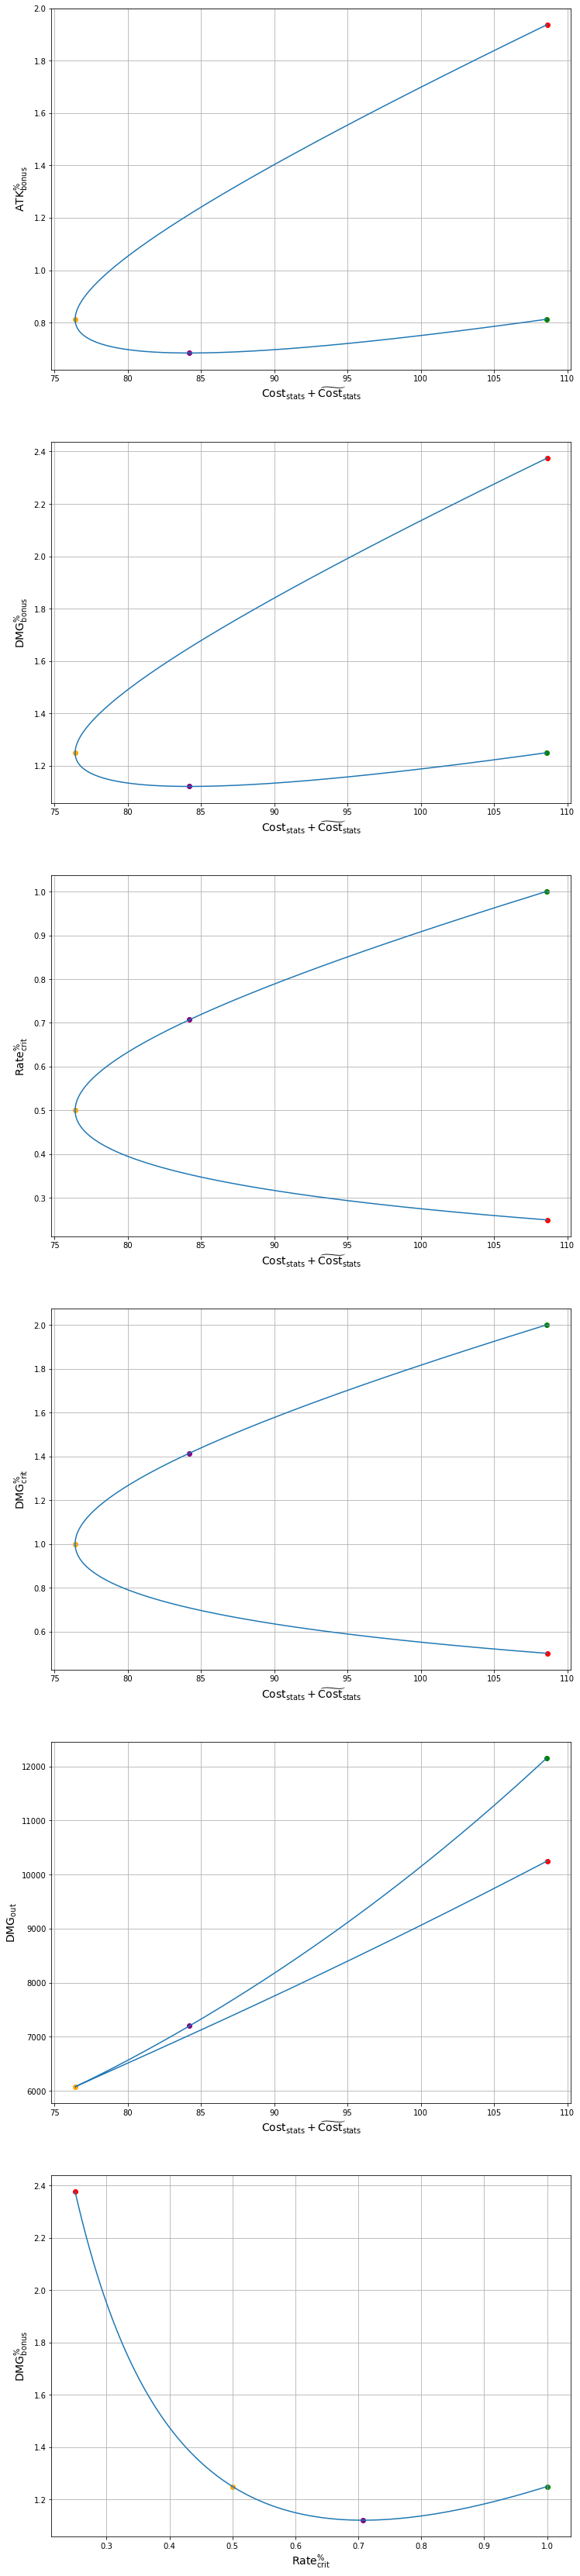

In [1]:
import numpy as np
from matplotlib import pyplot

atk_base = 800
atk_flat = 350

rate_crit = np.linspace(0.25, 1.0, 1000)
dmg_crit = 2 * rate_crit
dmg_bonus = (3/4) * (dmg_crit + 1/rate_crit) - 1
atk_bonus = dmg_bonus - atk_flat / atk_base
dmg_out = (atk_base * (1 + atk_bonus) + atk_flat) * (1 + dmg_bonus) * (1 + rate_crit * dmg_crit)
cost = atk_bonus/0.0466 + dmg_bonus/0.0466 + rate_crit/0.0311 + dmg_crit/0.0622

rate_crit_M = 0.5
dmg_crit_M = 2 * rate_crit_M
dmg_bonus_M = (3/4) * (dmg_crit_M + 1/rate_crit_M) - 1
atk_bonus_M = dmg_bonus_M - atk_flat / atk_base
dmg_out_M = (atk_base * (1 + atk_bonus_M) + atk_flat) * (1 + dmg_bonus_M) * (1 + rate_crit_M * dmg_crit_M)
cost_M = atk_bonus_M/0.0466 + dmg_bonus_M/0.0466 + rate_crit_M/0.0311 + dmg_crit_M/0.0622

rate_crit_R = 1 / np.sqrt(2)
dmg_crit_R = 2 * rate_crit_R
dmg_bonus_R = (3/4) * (dmg_crit_R + 1/rate_crit_R) - 1
atk_bonus_R = dmg_bonus_R - atk_flat / atk_base
dmg_out_R = (atk_base * (1 + atk_bonus_R) + atk_flat) * (1 + dmg_bonus_R) * (1 + rate_crit_R * dmg_crit_R)
cost_R = atk_bonus_R/0.0466 + dmg_bonus_R/0.0466 + rate_crit_R/0.0311 + dmg_crit_R/0.0622

fig, axs = pyplot.subplots(6, figsize=(12, 60))

axs[0].set_ylabel(r'$\mathrm{ATK_{bonus}^{\%}}$', fontsize=14)
axs[0].set_xlabel(r'$\mathrm{Cost_{stats}} + \mathrm{\widetilde{Cost}_{stats}}$', fontsize=14)
axs[0].plot(cost, atk_bonus)
axs[0].scatter(cost[0], atk_bonus[0], color='red')
axs[0].scatter(cost[-1], atk_bonus[-1], color='green')
axs[0].scatter(cost_M, atk_bonus_M, color='orange')
axs[0].scatter(cost_R, atk_bonus_R, color='purple')
axs[0].grid()

axs[1].set_ylabel(r'$\mathrm{DMG_{bonus}^{\%}}$', fontsize=14)
axs[1].set_xlabel(r'$\mathrm{Cost_{stats}} + \mathrm{\widetilde{Cost}_{stats}}$', fontsize=14)
axs[1].plot(cost, dmg_bonus)
axs[1].scatter(cost[0], dmg_bonus[0], color='red')
axs[1].scatter(cost[-1], dmg_bonus[-1], color='green')
axs[1].scatter(cost_M, dmg_bonus_M, color='orange')
axs[1].scatter(cost_R, dmg_bonus_R, color='purple')
axs[1].grid()

axs[2].set_ylabel(r'$\mathrm{Rate_{crit}^{\%}}$', fontsize=14)
axs[2].set_xlabel(r'$\mathrm{Cost_{stats}} + \mathrm{\widetilde{Cost}_{stats}}$', fontsize=14)
axs[2].plot(cost, rate_crit)
axs[2].scatter(cost[0], rate_crit[0], color='red')
axs[2].scatter(cost[-1], rate_crit[-1], color='green')
axs[2].scatter(cost_M, rate_crit_M, color='orange')
axs[2].scatter(cost_R, rate_crit_R, color='purple')
axs[2].grid()

axs[3].set_ylabel(r'$\mathrm{DMG_{crit}^{\%}}$', fontsize=14)
axs[3].set_xlabel(r'$\mathrm{Cost_{stats}} + \mathrm{\widetilde{Cost}_{stats}}$', fontsize=14)
axs[3].plot(cost, dmg_crit)
axs[3].scatter(cost[0], dmg_crit[0], color='red')
axs[3].scatter(cost[-1], dmg_crit[-1], color='green')
axs[3].scatter(cost_M, dmg_crit_M, color='orange')
axs[3].scatter(cost_R, dmg_crit_R, color='purple')
axs[3].grid()

axs[4].set_ylabel(r'$\mathrm{DMG_{out}}$', fontsize=14)
axs[4].set_xlabel(r'$\mathrm{Cost_{stats}} + \mathrm{\widetilde{Cost}_{stats}}$', fontsize=14)
axs[4].plot(cost, dmg_out)
axs[4].scatter(cost[0], dmg_out[0], color='red')
axs[4].scatter(cost[-1], dmg_out[-1], color='green')
axs[4].scatter(cost_M, dmg_out_M, color='orange')
axs[4].scatter(cost_R, dmg_out_R, color='purple')
axs[4].grid()

axs[5].set_ylabel(r'$\mathrm{DMG_{bonus}^{\%}}$', fontsize=14)
axs[5].set_xlabel(r'$\mathrm{Rate_{crit}^{\%}}$', fontsize=14)
axs[5].plot(rate_crit, dmg_bonus)
axs[5].scatter(rate_crit[0], dmg_bonus[0], color='red')
axs[5].scatter(rate_crit[-1], dmg_bonus[-1], color='green')
axs[5].scatter(rate_crit_M, dmg_bonus_M, color='orange')
axs[5].scatter(rate_crit_R, dmg_bonus_R, color='purple')
axs[5].grid()

print('[Orange point]:')
print('atk_bonus_M: {}'.format(atk_bonus_M))
print('dmg_bonus_M: {}'.format(dmg_bonus_M))
print('rate_crit_M: {}'.format(rate_crit_M))
print('dmg_crit_M: {}'.format(dmg_crit_M))
print('dmg_out_M: {}'.format(dmg_out_M))
print('cost_M: {}\n'.format(cost_M))

print('[Purple point]:')
print('atk_bonus_R: {}'.format(atk_bonus_R))
print('dmg_bonus_R: {}'.format(dmg_bonus_R))
print('rate_crit_R: 1/sqrt(2) = {}'.format(rate_crit_R))
print('dmg_crit_R: {}'.format(dmg_crit_R))
print('dmg_out_R: {}'.format(dmg_out_R))
print('cost_R: {}\n'.format(cost_R))